In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/kirtisailinaidu/Downloads/Logistic Regression/Titanic_train.csv')

print(df.head())

print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [3]:
df['Age'].fillna(df['Age'].median(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.drop(columns=['Cabin'], inplace=True)

df.dropna(subset=['Fare'], inplace=True)

print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [4]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

print(df.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop(columns='Survived')
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1 Score: 0.7639
ROC-AUC Score: 0.8002
[[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



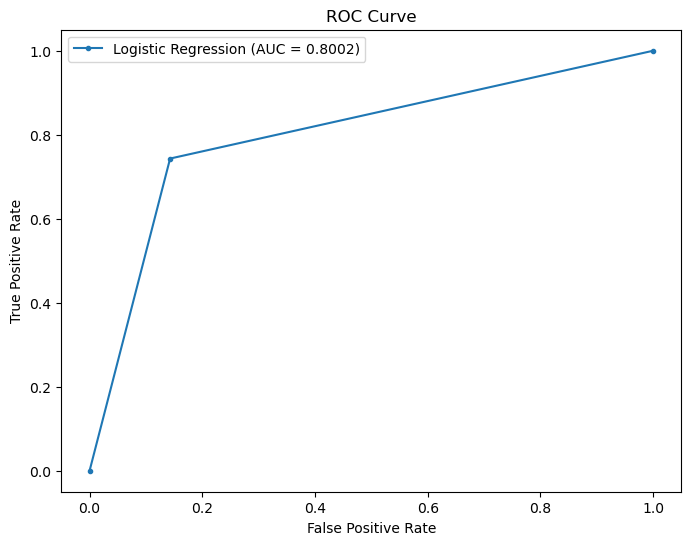

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

# Make predictions on the testing set
y_pred = log_reg.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')

# Print confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='Logistic Regression (AUC = %0.4f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [7]:
# Retrieve and display the coefficients
coefficients = pd.DataFrame(log_reg.coef_[0], index=X.columns, columns=['Coefficient'])
print(coefficients)

# Discuss feature significance
coefficients_sorted = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients_sorted)

            Coefficient
Pclass        -0.937949
Age           -0.030573
SibSp         -0.295104
Parch         -0.108298
Fare           0.002580
Sex_male      -2.591118
Embarked_Q    -0.112552
Embarked_S    -0.399607
            Coefficient
Fare           0.002580
Age           -0.030573
Parch         -0.108298
Embarked_Q    -0.112552
SibSp         -0.295104
Embarked_S    -0.399607
Pclass        -0.937949
Sex_male      -2.591118


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

# Load the Titanic dataset
df = pd.read_csv('/Users/kirtisailinaidu/Downloads/Logistic Regression/Titanic_train.csv')

# Preprocessing
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df.dropna(subset=['Fare'], inplace=True)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Splitting the data
X = df.drop(columns='Survived')
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Save the model to disk
pickle.dump(log_reg, open('logistic_regression_model.pkl', 'wb'))

In [18]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Load the trained model
model = pickle.load(open('logistic_regression_model.pkl', 'rb'))

# Streamlit app
st.title('Titanic Survival Prediction')
st.write('This app predicts the probability of survival on the Titanic.')

# User input for features
pclass = st.selectbox('Passenger Class', [1, 2, 3])
age = st.slider('Age', 0, 80, 29)
sibsp = st.slider('Number of Siblings/Spouses Aboard', 0, 8, 0)
parch = st.slider('Number of Parents/Children Aboard', 0, 6, 0)
fare = st.slider('Fare', 0, 500, 32)
sex_female = st.selectbox('Sex', ['male', 'female']) == 'female'
embarked = st.selectbox('Port of Embarkation', ['S', 'C', 'Q'])

# Convert embarked input to one-hot encoding
embarked_C = embarked == 'C'
embarked_Q = embarked == 'Q'

# Prepare the input array
input_data = np.array([[pclass, age, sibsp, parch, fare, sex_female, embarked_C, embarked_Q]])

# Predict survival probability
prediction_proba = model.predict_proba(input_data)[0][1]

st.write(f'The predicted survival probability is {prediction_proba:.2f}')

/Users/kirtisailinaidu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [19]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [22]:
import streamlit as st

st.write("Hello world")